## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading the Dataset

In [2]:
#reading the dataset
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Business Approach

### We have 3 kinds of broad spectrums into which we can divide the variables into:


### Customer Information:
1. emp_title
2. emp_length
3. home_ownership
4. annual_inc
5. verification_status
6. addr_state
7. zip_code
8. title
9. purpose
   


### Loan Information:
1. funded_amnt
2. int_rate
3. loan_status
4. grade
5. sub_grade
6. dti
7. loan_issue_d
8. term
9. installment


### Customer Behavorial Metrics:
1. delinq_2yrs
2. earliest_cr_line
3. inq_last_6mths
4. open_acc
5. pub_rec
6. revol_bal
7. revol_util
8. total_acc
9. out_prncp
10. out_prncp_inv
11. total_pymnt
12. total_pymnt_inv
13. total_rec_int
14. total_rec_late_fee
15. recoveries
16. collection_recovery_fee
17. last_payment_d
18. last_pymnt_amnt
19. next_pymnt_d
20. last_credit_pull_d
21. application_type

### Business Objective:
To determine the qualities or characteristics that are the most affecting ones in deciding whether or not a customer would default on the loan.

### Checking overall data quality:

In [3]:
df.shape

(39717, 111)

In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


### Data Cleaning:

In [7]:
#Checking percentage of null values in each column
null_percentage = df.isnull().sum()/df.shape[0]*100
null_percentage.sort_values(ascending=False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [8]:
#Dropping all columns which have more than 50% missing values in them
cols_to_drop = null_percentage[null_percentage>60].keys()
cols_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [9]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending = False)

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000


### Filtering the data for only relevant columns:
Apart from the variables mentioned in the 3 broad spectrums, no other variables are useful when it comes to identifying or predicting the default. They are primarily used to keep a track of the customer after the loan has been approved, which in this case, falls out of our scope, as we are looking at one stage behind this i.e. deciding whether to approve the loan or not in the first place.

### To procure insights on loan default data, we would not use the Customer Behavorial metrics as they would not be available to us at the time the customer first approaches.

### Also from the pre-existing columns, on taking a deeper look we find that:
1. Address, ZIP code, State variables are not relevant to the scope
2. Title variable is derived from the variable Purpose
3. ID and Member ID are not particularly useful for our analysis
4. Collection_12_mths_ex_med and chargeoff_within_12mths, tax_liens have only zeroes and NANs
5. acc_now_delinq and delinq_amnt also have only 1 value 0
6. Policy_code has only one variable 1
7. initial_status_list also has only 1 value of "f"

Clearly enough, we would not be using these variables in our analysis

In [11]:
cols = ['emp_title ','emp_length','home_ownership','annual_inc','verification_status','addr_state','purpose','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','loan_status','grade','sub_grade','dti','issue_d','term','installment', 'pub_rec_bankruptcies']
cols_not_required = [col for col in df.columns if col not in cols]
for col in cols_not_required:
    df.drop(col, axis = 1,inplace=True)

## Filtering Data for rows based on Loan status:
Removing rows where loan status as current, as it is not in our scope to predict if for a person whose loan is already approved, will he default or not

In [12]:
df.shape

(39717, 18)

In [13]:
df = df[df.loan_status != 'Current']

In [14]:
df.shape

(38577, 18)

## Type Casting

In [15]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [16]:
df['issue_year'] = df['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)
df['issue_month'] = df['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').month)

In [17]:
#the issue data here is in the form of mmm-yy and coded as a string. Changing it to a more suitable datetime format that is easily readable
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')

In [19]:
# a function to directly display the interest rate as a float instead of an object
def percent_to_float(x):
    return float(x.strip('%'))/100

df['int_rate'] = df['int_rate'].apply(percent_to_float)

### Data Quality Checks

In [23]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
issue_year                 0
issue_month                0
dtype: int64

In [24]:
#we can see that the employee length column has some missing values
#since it is a categorical variable, we will use mode imputation 
df = df.fillna(df.mode().iloc[0])

In [25]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
issue_year              0
issue_month             0
dtype: int64

### We will not be dealign with outliers detection/removal, as we want to study the entirety of the dataset and outliers can provide us with vital information and insights about our business objective

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# as we will be creating a lot of graphs, it is easier to create a function 
sns.set(style="darkgrid")
#ax = sns.countplot(x="loan_status", data=loans)
def plt_frequency(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

## Univariate Analysis: Categorical Variables

### 1. Default Rates

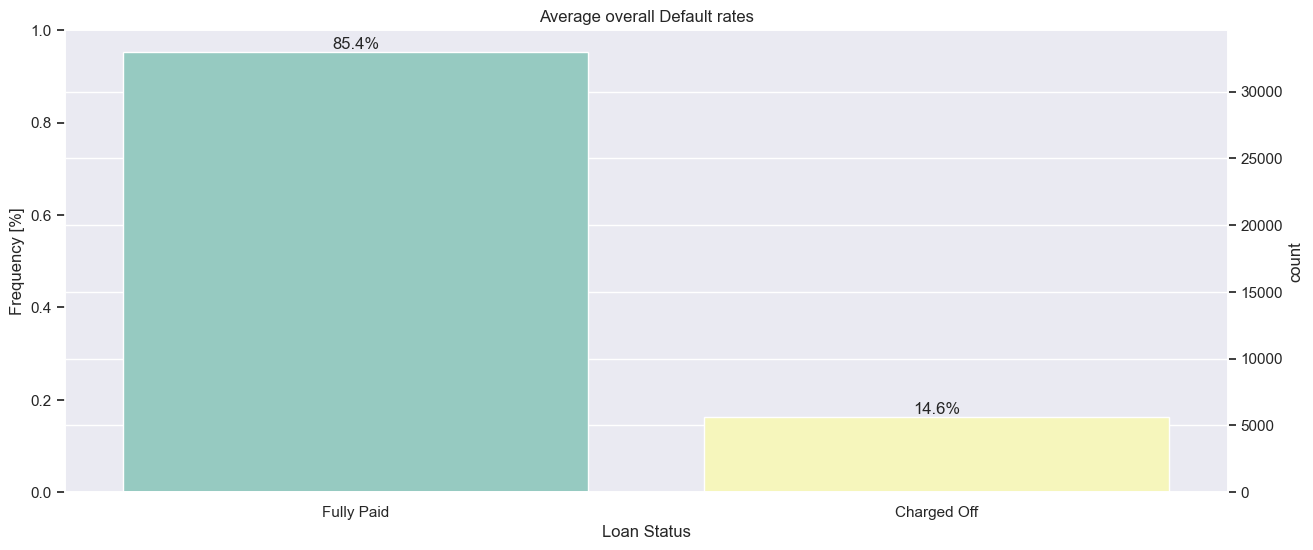

In [29]:
plt_frequency("loan_status",df,'Loan Status','Average overall Default rates')


#### There are 14.6% loan defaults on an average

### 2. Number of loans per year

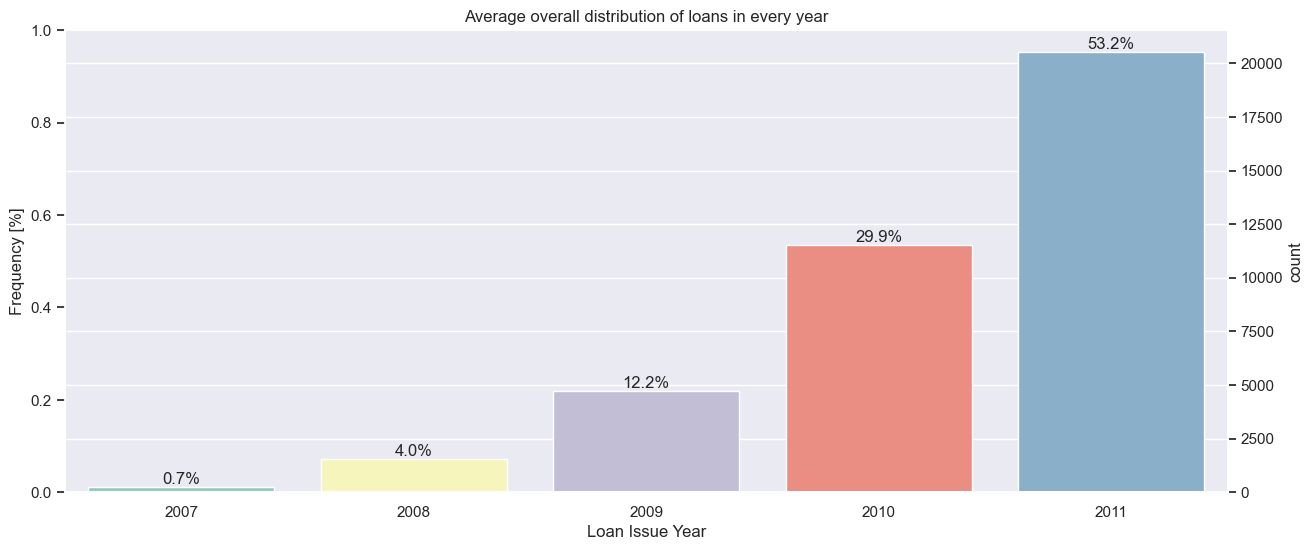

In [30]:
plt_frequency("issue_year",df,'Loan Issue Year','Average overall distribution of loans in every year')


#### The number of loans being approved every year is increasing at a very high rate

### 3. Purpose of the loan taken:

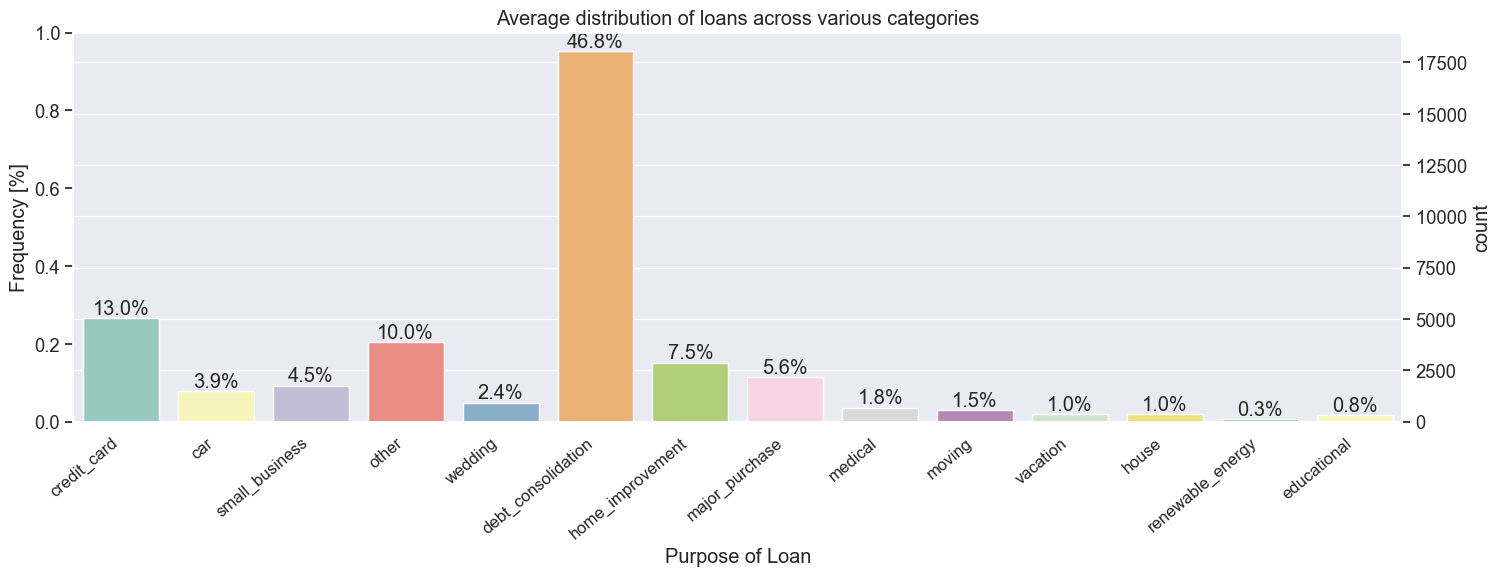

In [121]:
plt_frequency("purpose",df,'Purpose of Loan','Average distribution of loans across various categories',None,1)


In [126]:
dt = df

In [127]:
# filtering only fully paid or charged-off
dt = dt[dt['loan_status'] != 'Current']
dt['loan_status'] = dt['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
dt['loan_status'] = dt['loan_status'].astype('int')

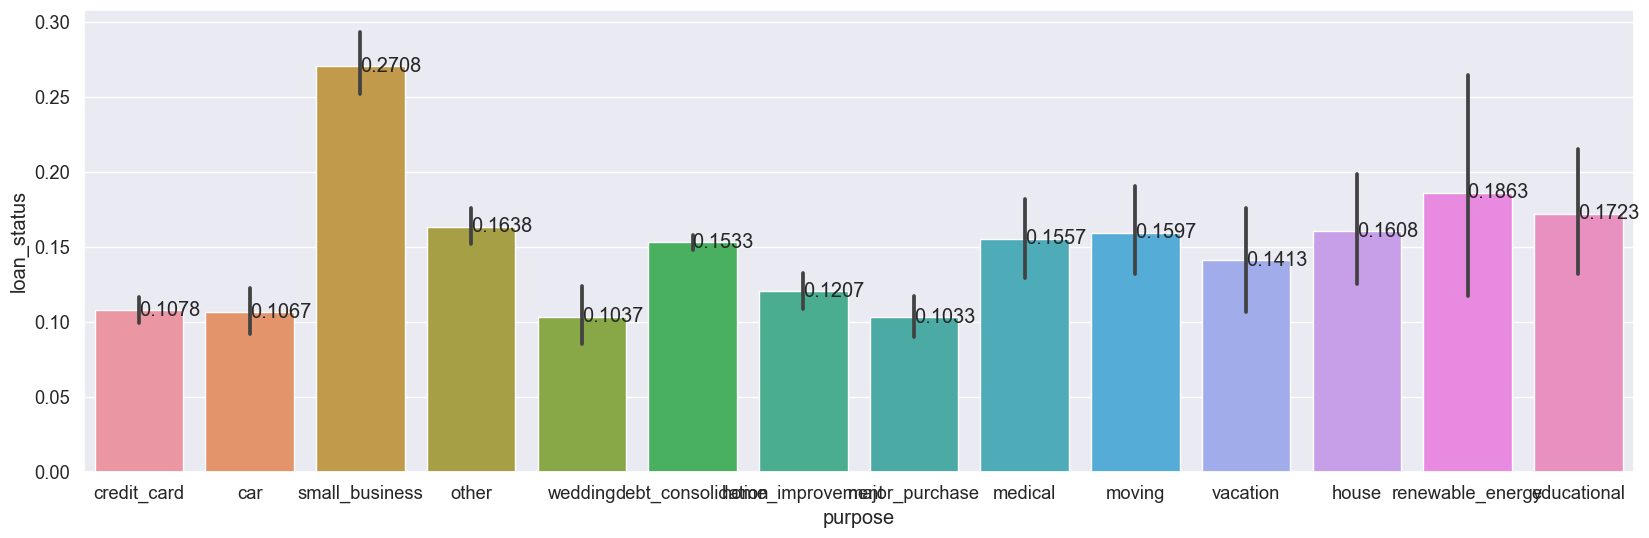

In [128]:
def plot_cat(cat_var):
    var = sns.barplot(x=cat_var, y='loan_status', data=dt)
    total = dt[cat_var].count()
    for p in var.patches:
        var.annotate(f'{round(p.get_height(),4)}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='left', va='center')
    plt.show()
plt.figure(figsize=(20, 6))
plot_cat('purpose')

#### Debt consolidation, other, credt cards and home improvent are the predominant reasons behind taking a loan

### 4. Grades of the loans approved:

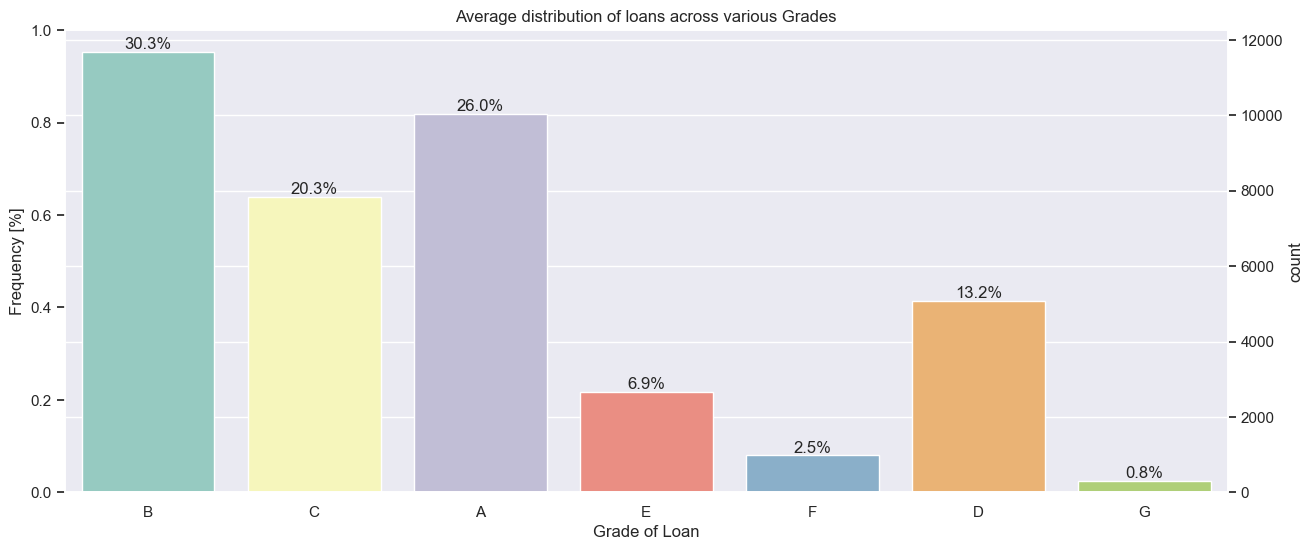

In [32]:
plt_frequency("grade",df,'Grade of Loan','Average distribution of loans across various Grades')

#### A,B and C are the most common grades of the loans being approved over the years

### 5: Employee Experience:

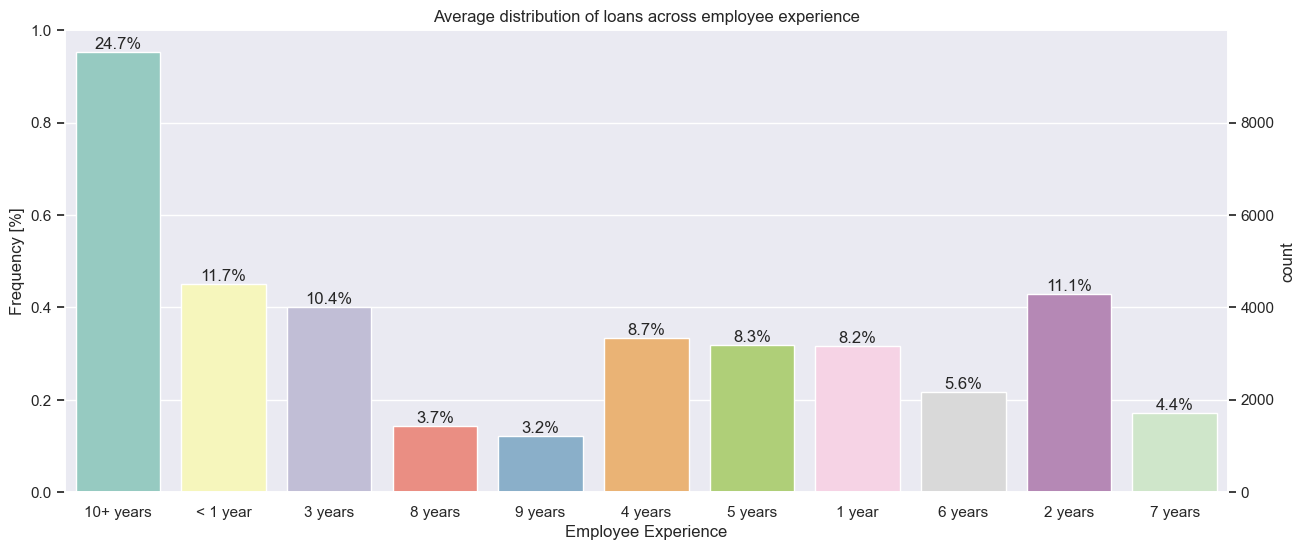

In [33]:
plt_frequency("emp_length",df,'Employee Experience','Average distribution of loans across employee experience')

#### Most of the loans are taken by frehsers with less than 1 year of experience or experienced people with more than 10 years of experience

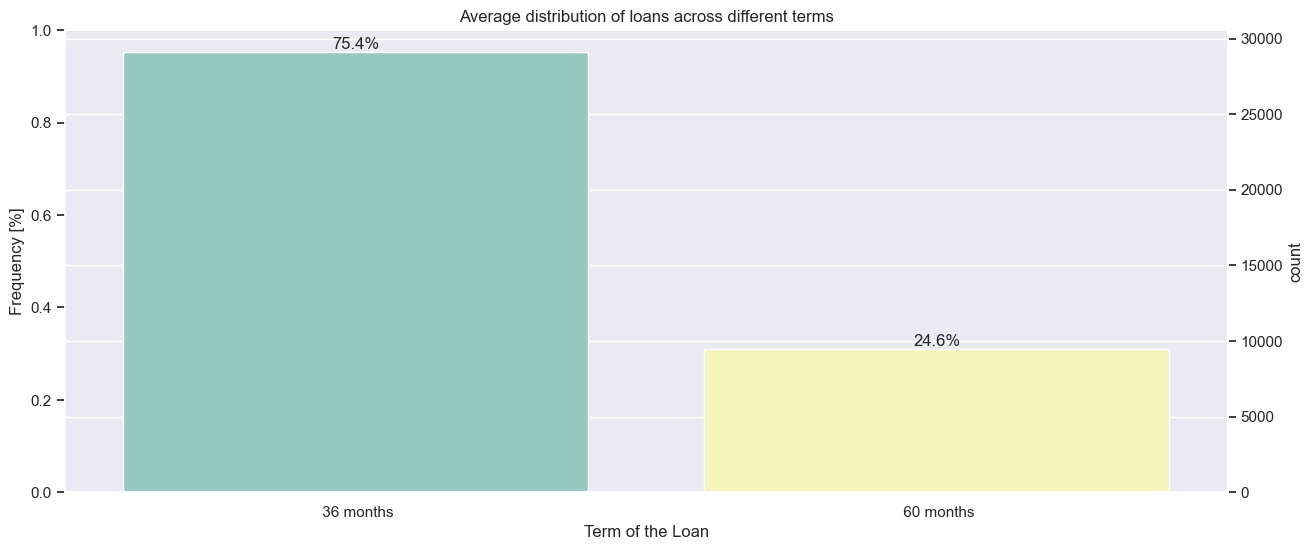

In [34]:
plt_frequency("term",df,'Term of the Loan','Average distribution of loans across different terms')

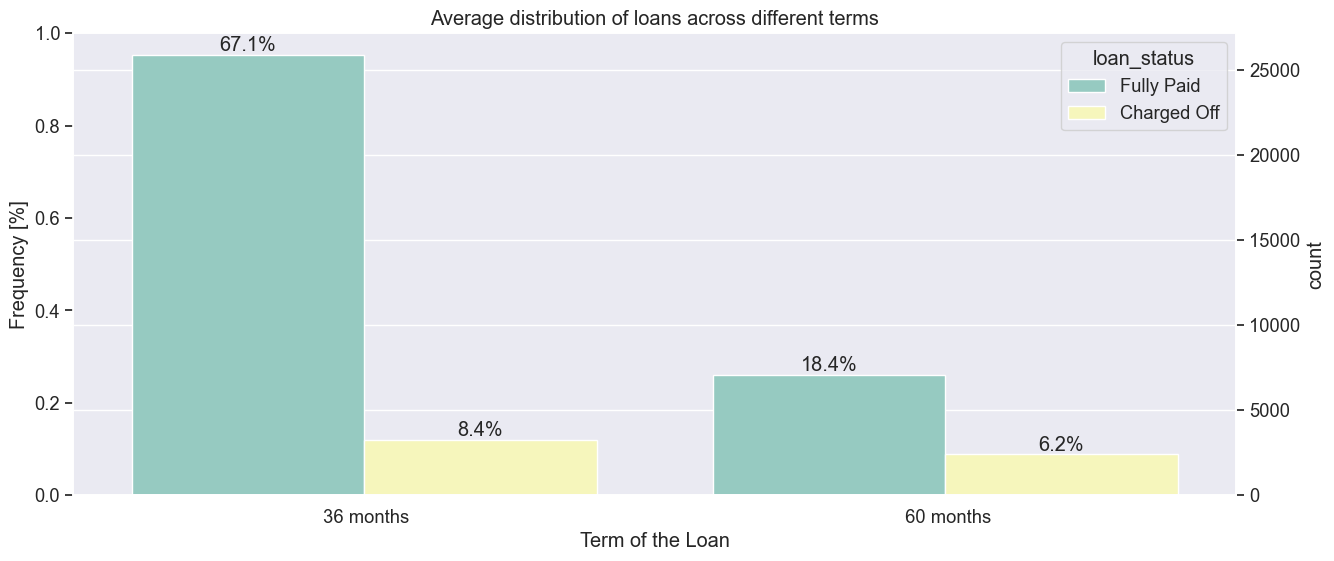

In [117]:
plt_frequency("term",df,'Term of the Loan','Average distribution of loans across different terms', 'loan_status')

In [118]:
total_defaults('term')

,Total Count,No. of Defaults,Default %
term,,,
36 months,29096,3227,57.348498
60 months,9481,2400,42.651502


#### Most of the loans are taken for a term of 26 months i.e. 2 years

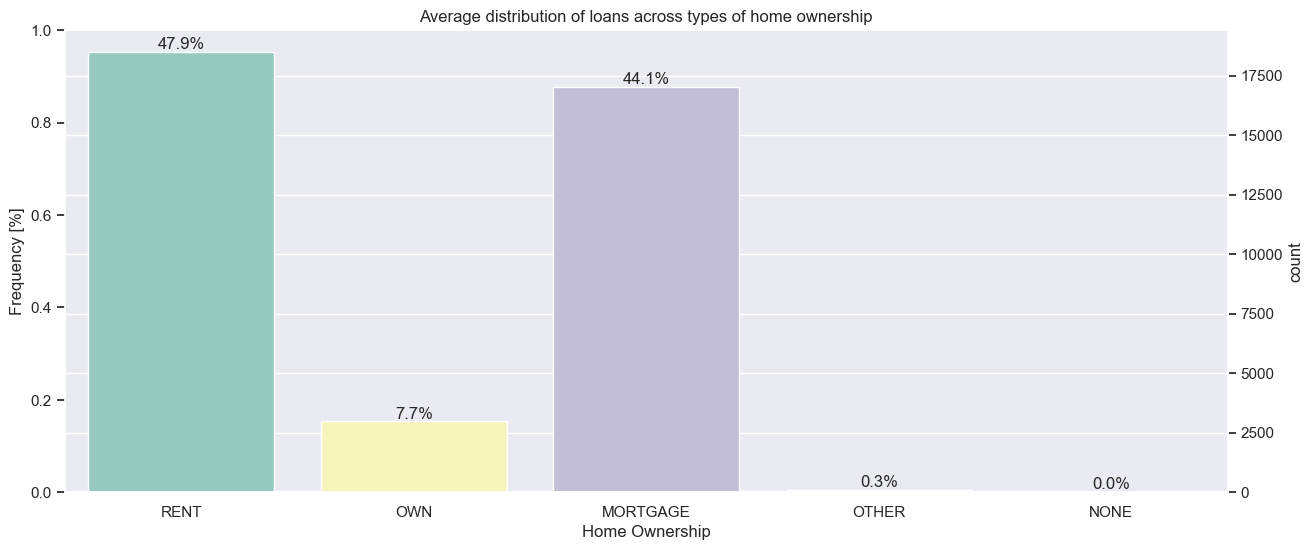

In [35]:
plt_frequency("home_ownership",df,'Home Ownership','Average distribution of loans across types of home ownership')

#### Most of the loan applicants do not have a house of their own, they are either renting it or have mortgaged it

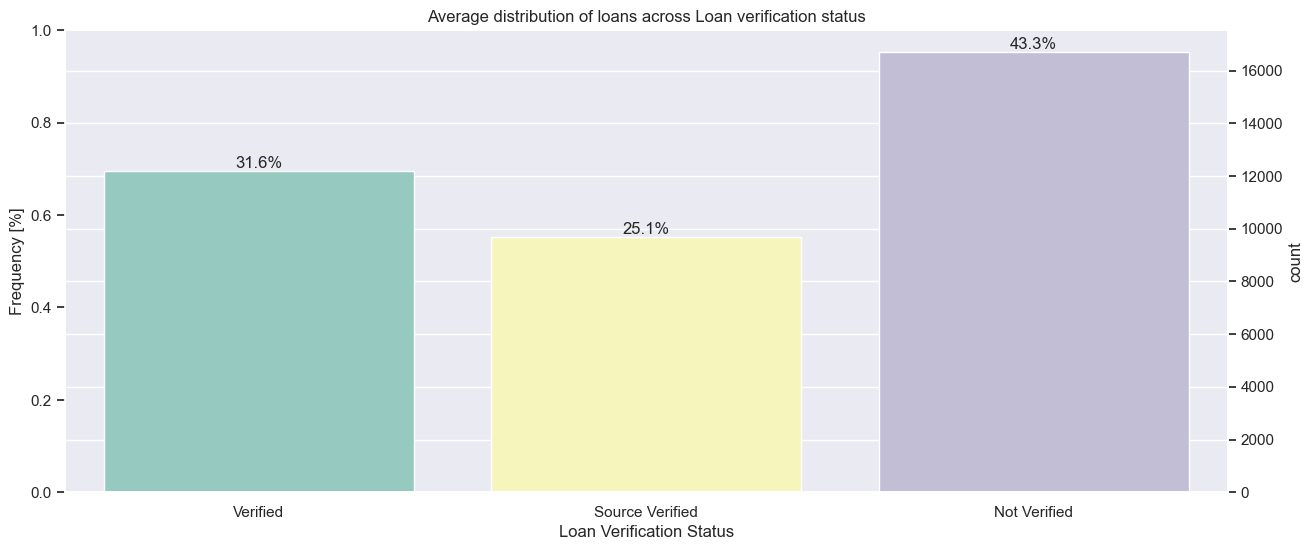

In [36]:
plt_frequency("verification_status",df,'Loan Verification Status','Average distribution of loans across Loan verification status')

#### There is no clear indication or pattern regarding the verification status of the customer

### Loan Amount

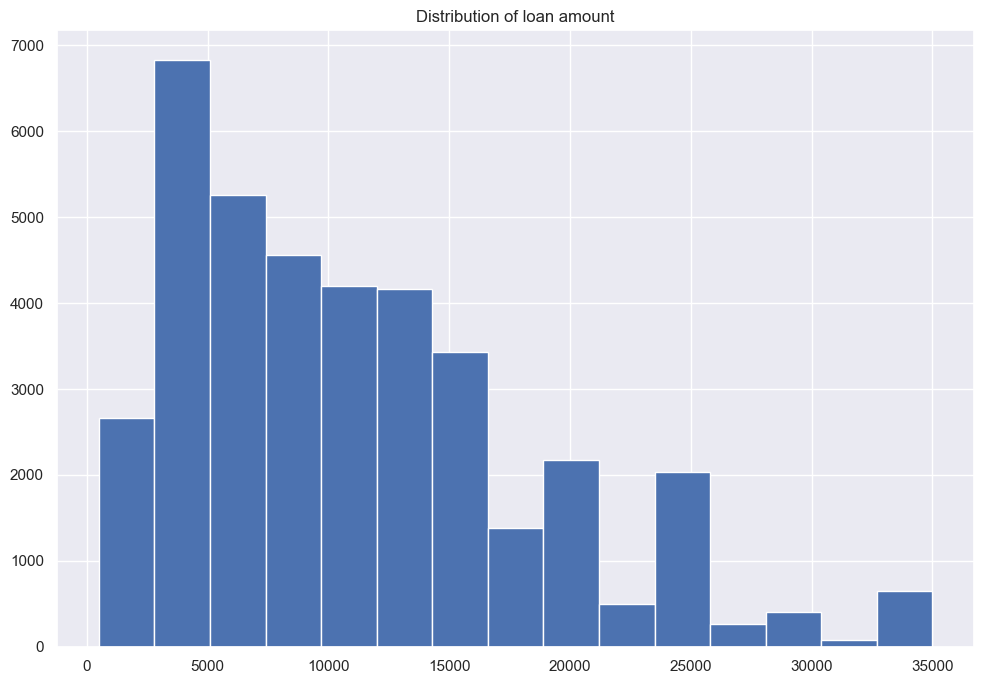

In [37]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(df['loan_amnt'], bins = 15)
plt.title('Distribution of loan amount')
plt.show()

#### Most of the loans are taken for an amount between 5000 and 10000

### Installments

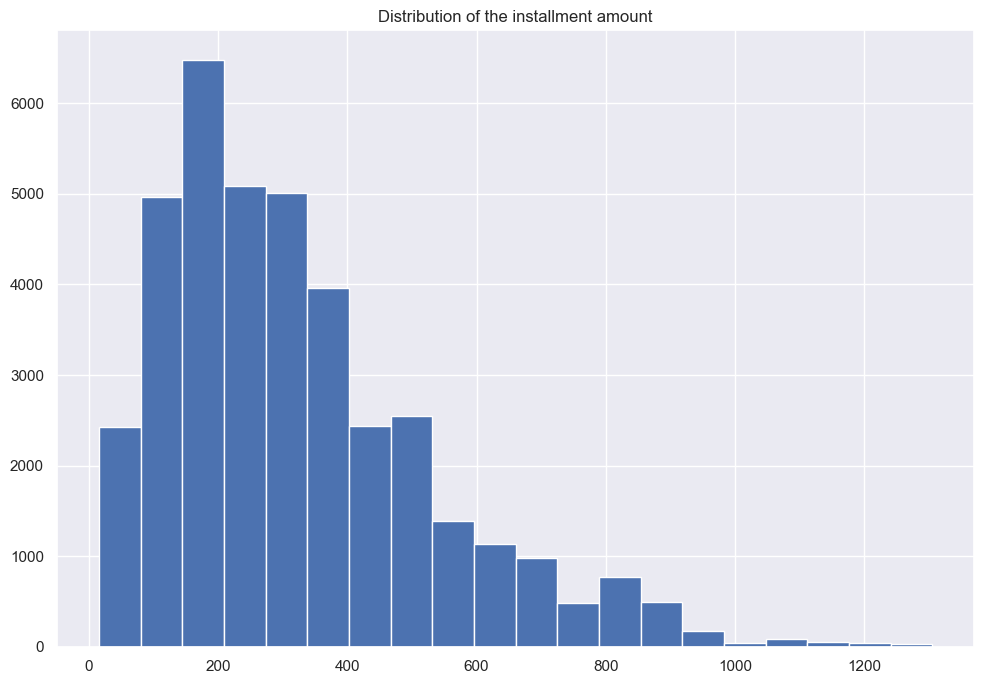

In [38]:
fig, axs = plt.subplots(1, 1,figsize =(10, 7),tight_layout = True)
axs.hist(df['installment'], bins = 20)
plt.title('Distribution of the installment amount')
plt.show()

#### The most common installment rate that people opt for is around 150-350

### Interest Rate:

<AxesSubplot:xlabel='int_rate', ylabel='loan_status'>

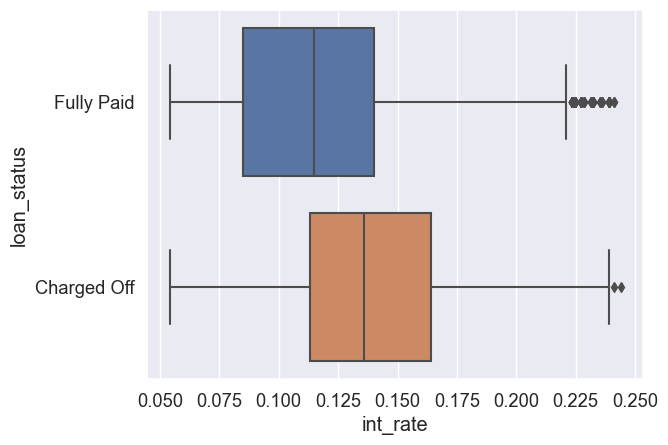

In [116]:
sns.boxplot(df['int_rate'], df['loan_status'])

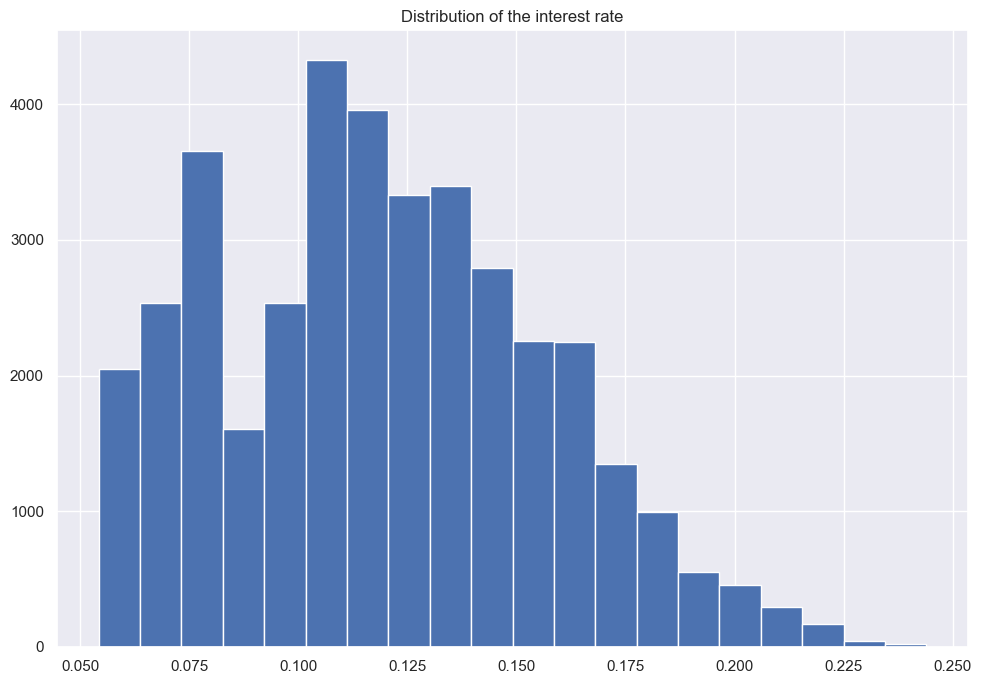

In [39]:
fig, axs = plt.subplots(1, 1,figsize =(10, 7),tight_layout = True)
axs.hist(df['int_rate'], bins = 20)
plt.title('Distribution of the interest rate')
plt.show()

#### The most common interest rate ranges from 10 to 12%

### Derived Metrics:
#### To gain better insights on the data, it is always a good practice to build some new variables which are able to summarize the information in a better way

### 1. DTI: Debt to income ratio: Monthly debt payments divided by the gross monthly income

In [40]:
df['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [41]:
def dti_bucket(dti):
    if dti<= 10.00:
        return 'low'
    elif (dti>0.10 and dti <=20.00):
        return 'medium'
    else:
        return 'high'

In [42]:
df['dti_bucket'] = df['dti'].apply(lambda x : dti_bucket(x))

### 2. Job level of employee: Fresher/ Mid-Senior/ Senior

In [43]:
df['emp_length'] = df['emp_length'].apply(lambda x: (''.join(filter(str.isdigit, str(x)))))
df = df[df['emp_length']!=""]
def job_level(exp):
    if exp <= 1 :
        return 'Fresher'
    elif (exp >1 and exp<=3):
        return 'Entry level'
    elif (exp>3 and exp<=7):
        return 'Mid Senior'
    else:
        return 'Senior'

In [46]:
df['job_level'] = df['emp_length'].apply(lambda x: job_level(int(x)))

## Univariate Segmented Analysis:

### 1. Job Level

In [47]:
def total_defaults(cat_var):
    # Calculate value counts
    value_counts = df[cat_var].value_counts()

    # Calculate value counts for 'purpose' where loan_status is 'Charged Off'
    default_count = df.loc[df['loan_status'] == 'Charged Off', cat_var].value_counts()

    # Calculate total number of 'Charged Off' records
    total_default_records = len(df[df['loan_status'] == 'Charged Off'])

    # Calculate default percentages based on total 'Charged Off' records
    default_percentages = (default_count / total_default_records) * 100


    # Create a DataFrame combining all the calculated values
    result = pd.DataFrame({'Total Count': value_counts,
                           'No. of Defaults': default_count, 'Default % ': default_percentages})

    # Sort the DataFrame by Counts in descending order
    result = result.sort_values(by='Total Count', ascending=False)

    # Display the combined and sorted result
    return result

### 1. Job Level

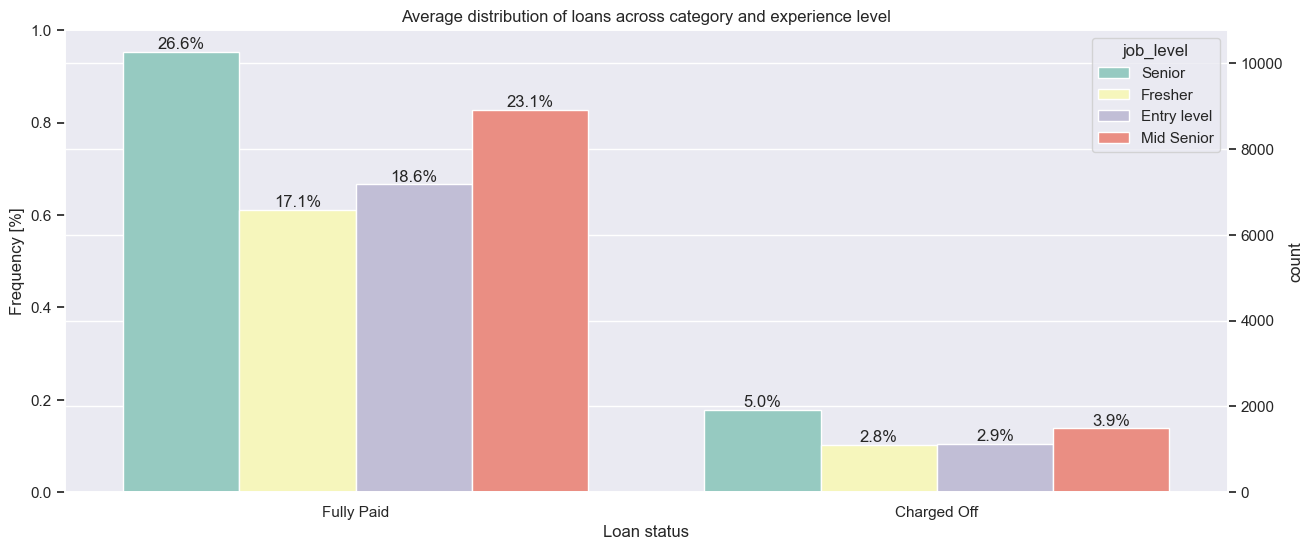

In [48]:
plt_frequency("loan_status",df,'Loan status','Average distribution of loans across category and experience level','job_level')

In [49]:
total_defaults('job_level')

,Total Count,No. of Defaults,Default %
job_level,,,
Senior,12182,1920,34.121201
Mid Senior,10415,1490,26.479474
Entry level,8303,1122,19.939577
Fresher,7677,1095,19.459748


#### Senior people who have more than 10 years of experience are likely to default on the loan more

### DTI Ranges:

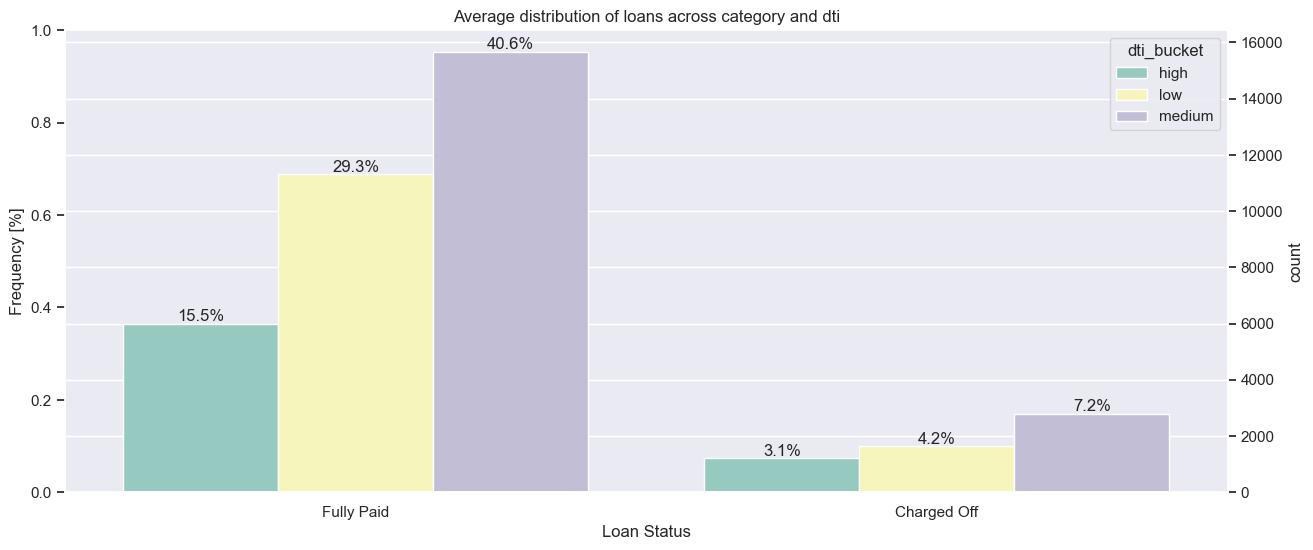

In [55]:
plt_frequency("loan_status",df,'Loan Status','Average distribution of loans across category and dti','dti_bucket')

In [56]:
total_defaults('dti_bucket')

,Total Count,No. of Defaults,Default %
dti_bucket,,,
medium,18441,2791,49.600142
low,12935,1631,28.985250
high,7201,1205,21.414608


#### People with medium DTI Ranges ( 10 - 20 ) tend to default on the loans much hgher than any other category

### Grade

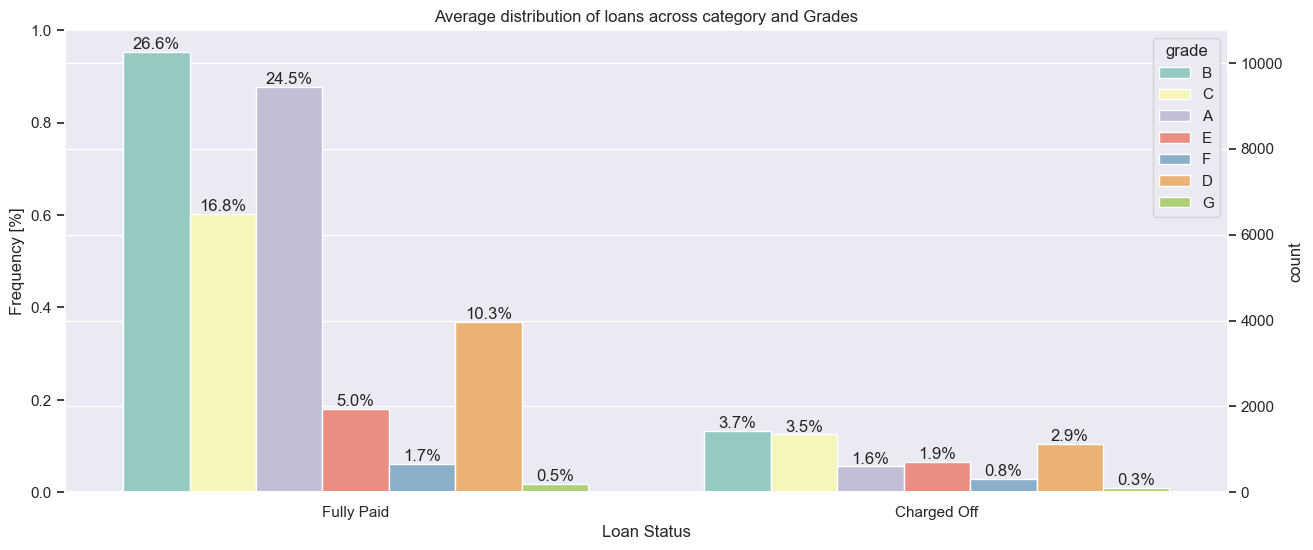

In [57]:
plt_frequency("loan_status",df,'Loan Status','Average distribution of loans across category and Grades','grade')

In [58]:
total_defaults('grade')

,Total Count,No. of Defaults,Default %
grade,,,
B,11675,1425,25.324329
A,10045,602,10.698418
C,7834,1347,23.938155
D,5085,1118,19.868491
E,2663,715,12.706593
F,976,319,5.669095
G,299,101,1.794917


#### Here we have our first target group: Loan grade C and loan grade D. Even though the number of loan approvals are less, these 2 groups tend to default on the loans much higher than their other counterparts

## Bivariate Analysis:

In [60]:
#for simplicity, clubbing the verification status column into just 2 orders: Verified and Not Verified
df['verification_status'] = df['verification_status'].apply(lambda x: 'Verified' if (x=='Verified' or x == 'Source Verified') else 'Not Verified')

In [83]:
def plt_frequency_subplot(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6,axis=None):
    ncount = len(df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax =sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3",ax=axis)
    plt.title(title)
    plt.xlabel(x_label)

    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

def create_subplot(x_var,data_df,x_label,title,hue_var=None,palette_var='Dark2',rot_flag=0,axis=None):
    ncount = len(df)
    if axis is None:
        axis= plt.gca()  
    bp = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette=palette_var,ax=axis)
    if(rot_flag==1):
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    axis.set_title(title)
    axis.set_xlabel(x_label)
    axis.set_ylabel('Frequency [%]')
    for p in axis.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axis.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    return bp

## Source Income and Loan Default

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

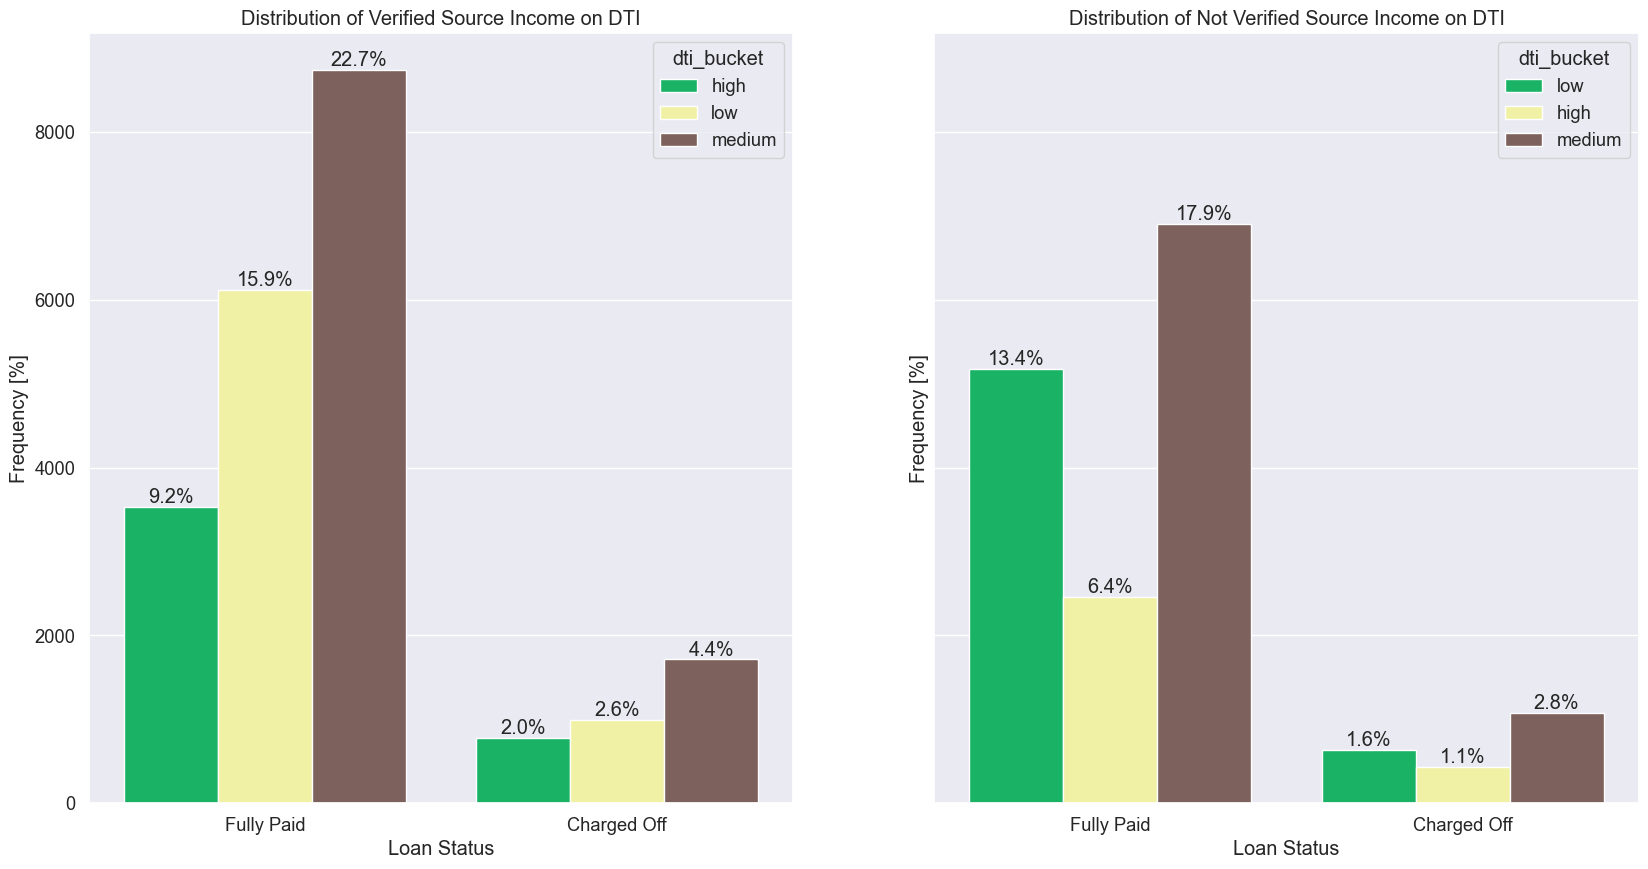

In [111]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
create_subplot('loan_status',df[df['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on DTI','dti_bucket','terrain',0, ax1)
create_subplot('loan_status',df[df['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on DTI','dti_bucket','terrain',0, ax2)   


####  People having medium dti ratio are likely to default more, no matter whether their income source is verified or not
#### People whose income is not verified and their dti is low, should also be monitored as they tend to default more as their income source is not verified thus explaining the low dti ratio

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Experience Level'}, xlabel='Loan Status', ylabel='Frequency [%]'>

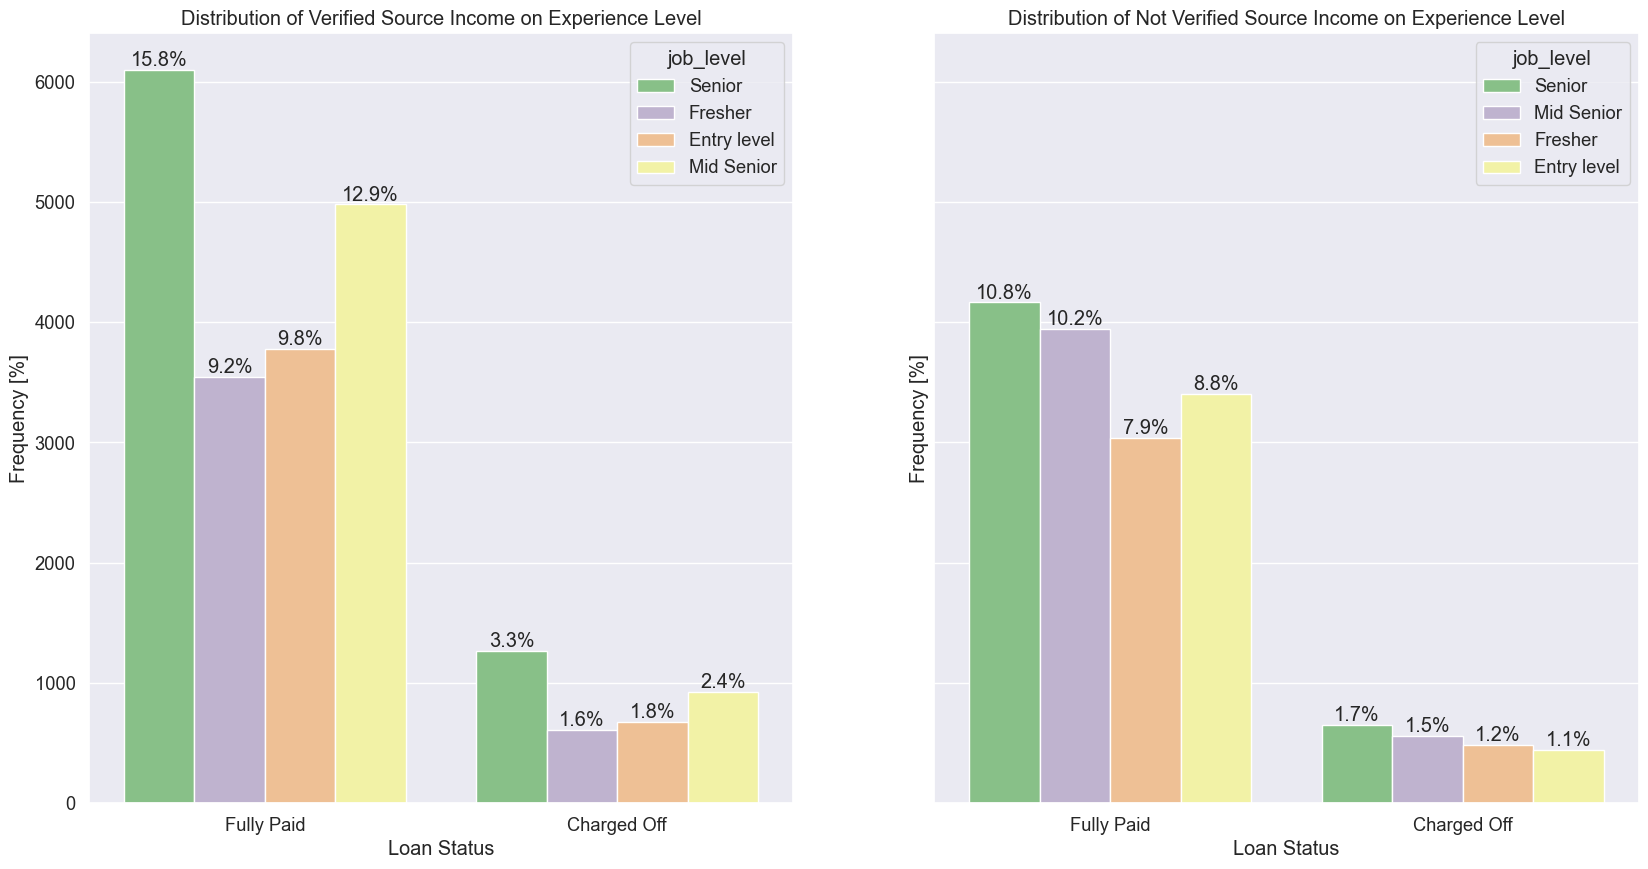

In [110]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
create_subplot('loan_status',df[df['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Experience Level','job_level','Accent',0, ax1)
create_subplot('loan_status',df[df['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Experience Level','job_level','Accent',0, ax2)   


#### People having 7+ years of job exp with a verified income source should be monitored as they are likely to default

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

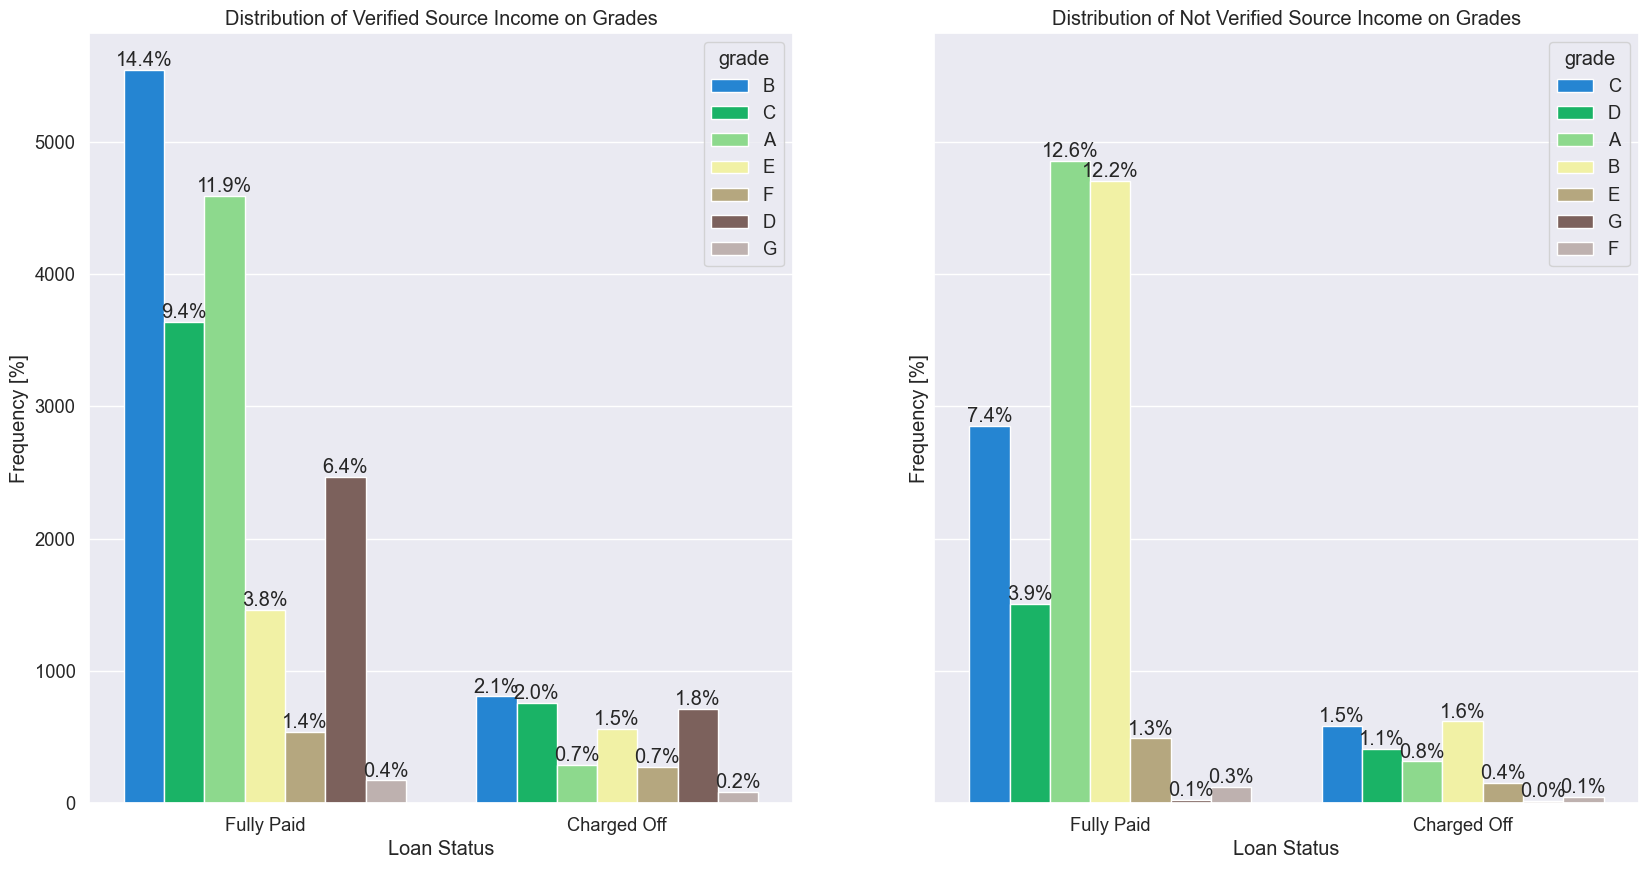

In [109]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
create_subplot('loan_status',df[df['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Grades','grade','terrain',0, ax1)
create_subplot('loan_status',df[df['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Grades','grade','terrain',0, ax2)   


#### Grade B and Grade C people, more importantly them who do not have their income verified are likely to default

## House Ownership and Loan default

<AxesSubplot:title={'center':'Distribution of Owned Asset on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

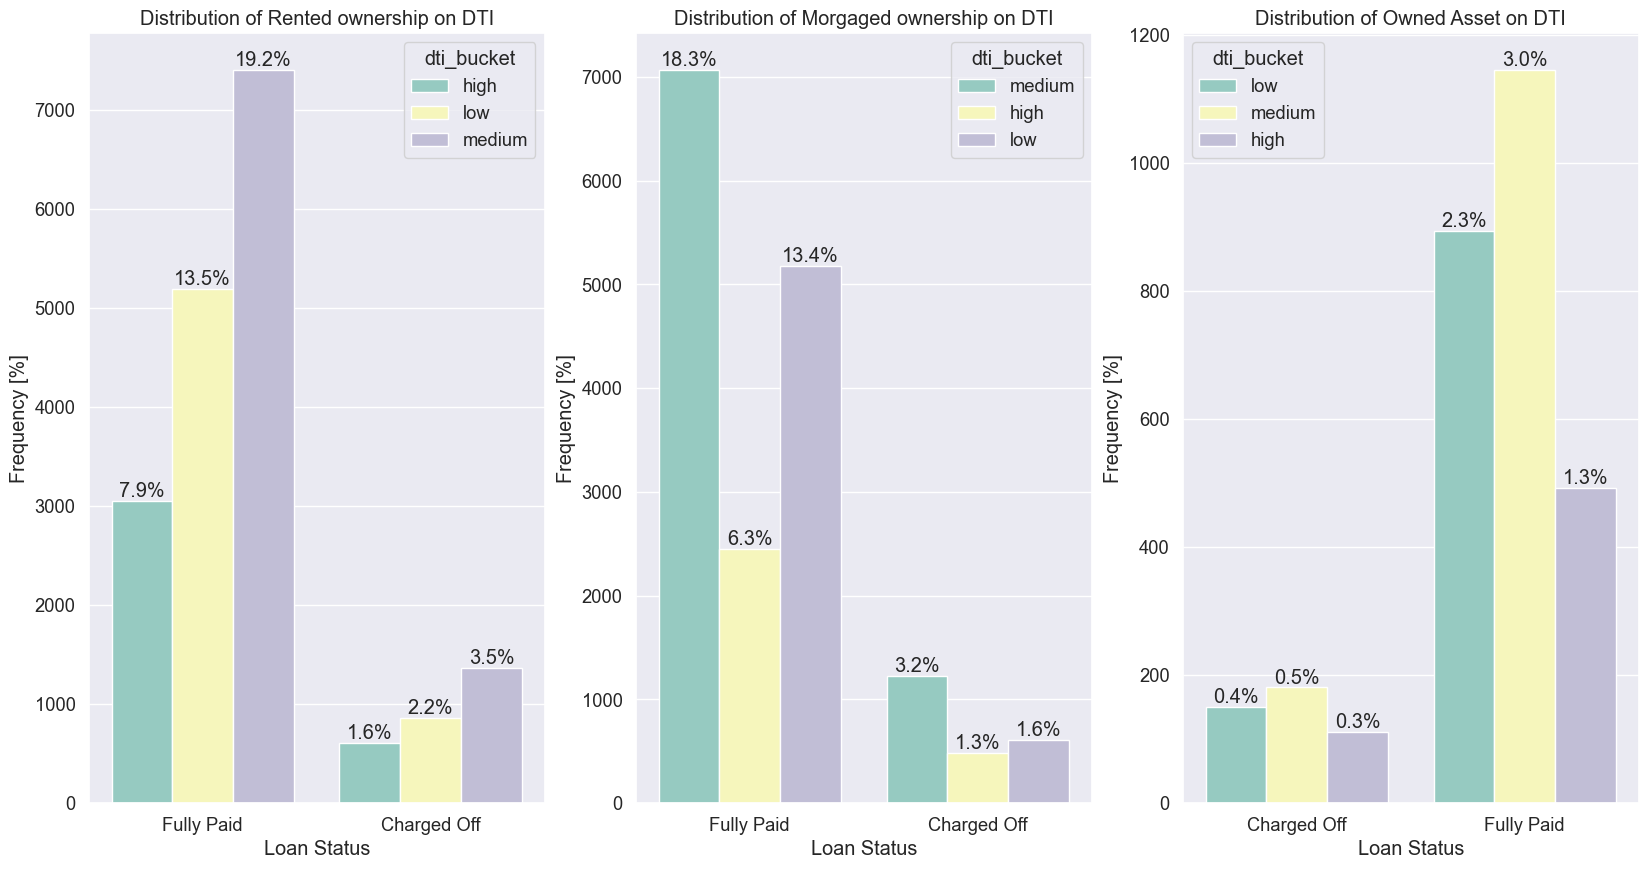

In [108]:
fig, axs = plt.subplots(ncols=3,figsize=(20,10))
create_subplot('loan_status',df[df['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on DTI','dti_bucket','Set3',0, axs[0])
create_subplot('loan_status',df[df['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on DTI','dti_bucket','Set3',0, axs[1])   
create_subplot('loan_status',df[df['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on DTI','dti_bucket','Set3',0, axs[2])   


<AxesSubplot:title={'center':'Distribution of Owned Asset on Job level'}, xlabel='Loan Status', ylabel='Frequency [%]'>

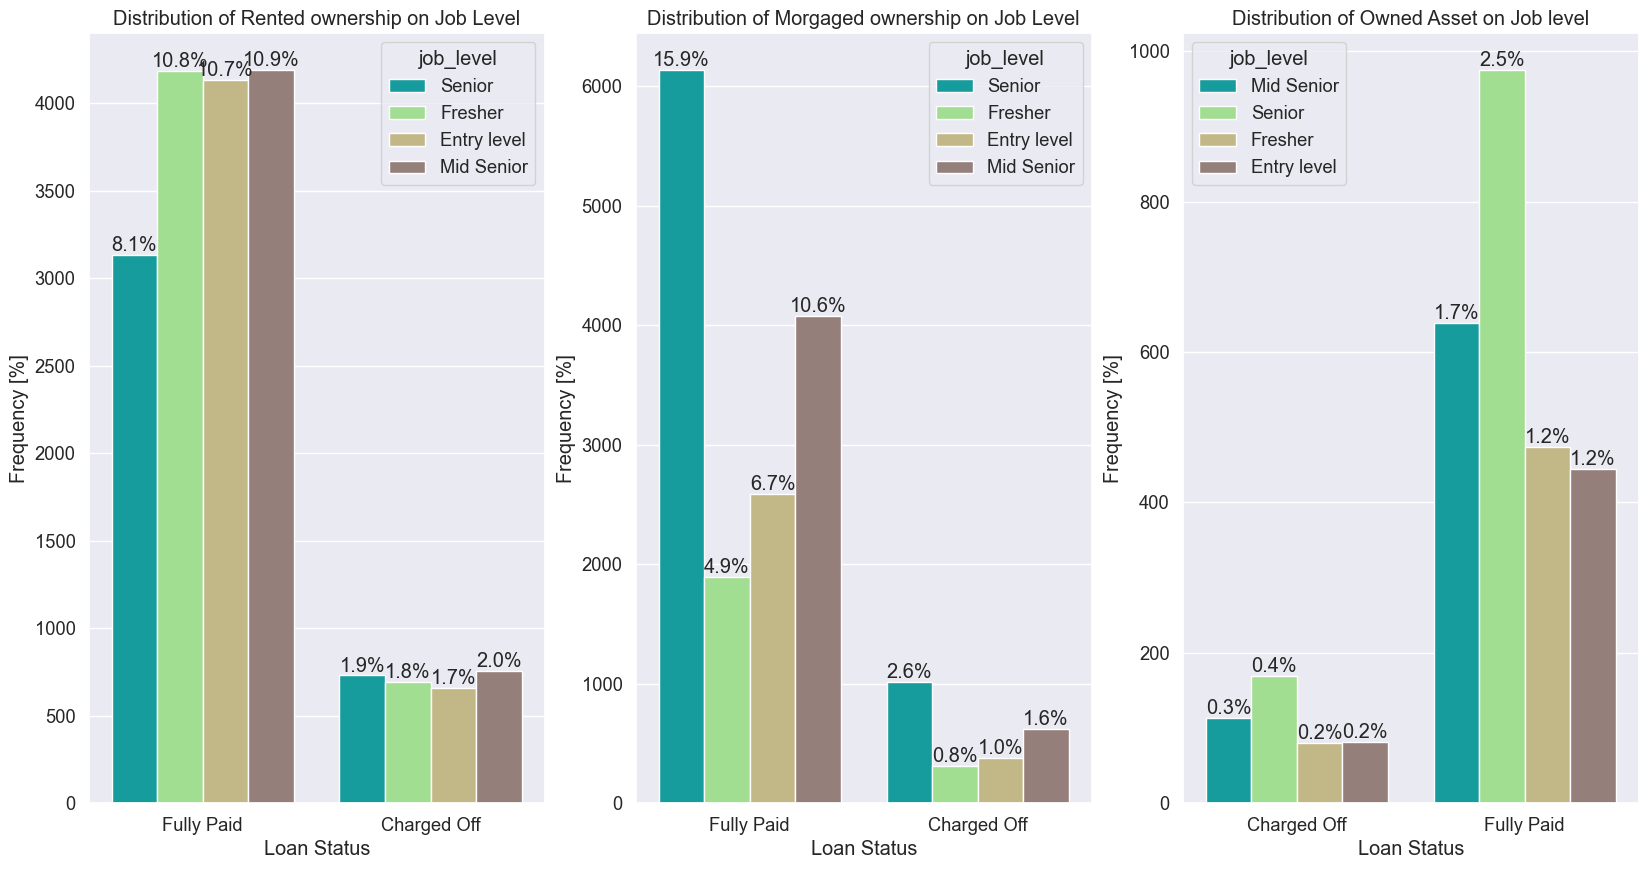

In [112]:
fig, axs = plt.subplots(ncols=3,figsize=(20,10))
create_subplot('loan_status',df[df['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Job Level','job_level','terrain',0, axs[0])
create_subplot('loan_status',df[df['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Job Level','job_level','terrain',0, axs[1])   
create_subplot('loan_status',df[df['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Job level','job_level','terrain',0, axs[2])   


#### Job experience level has no significant effect on people defaulting on loans, whether income is verified or not

<AxesSubplot:title={'center':'Distribution of Owned Asset on Grade'}, xlabel='Loan Status', ylabel='Frequency [%]'>

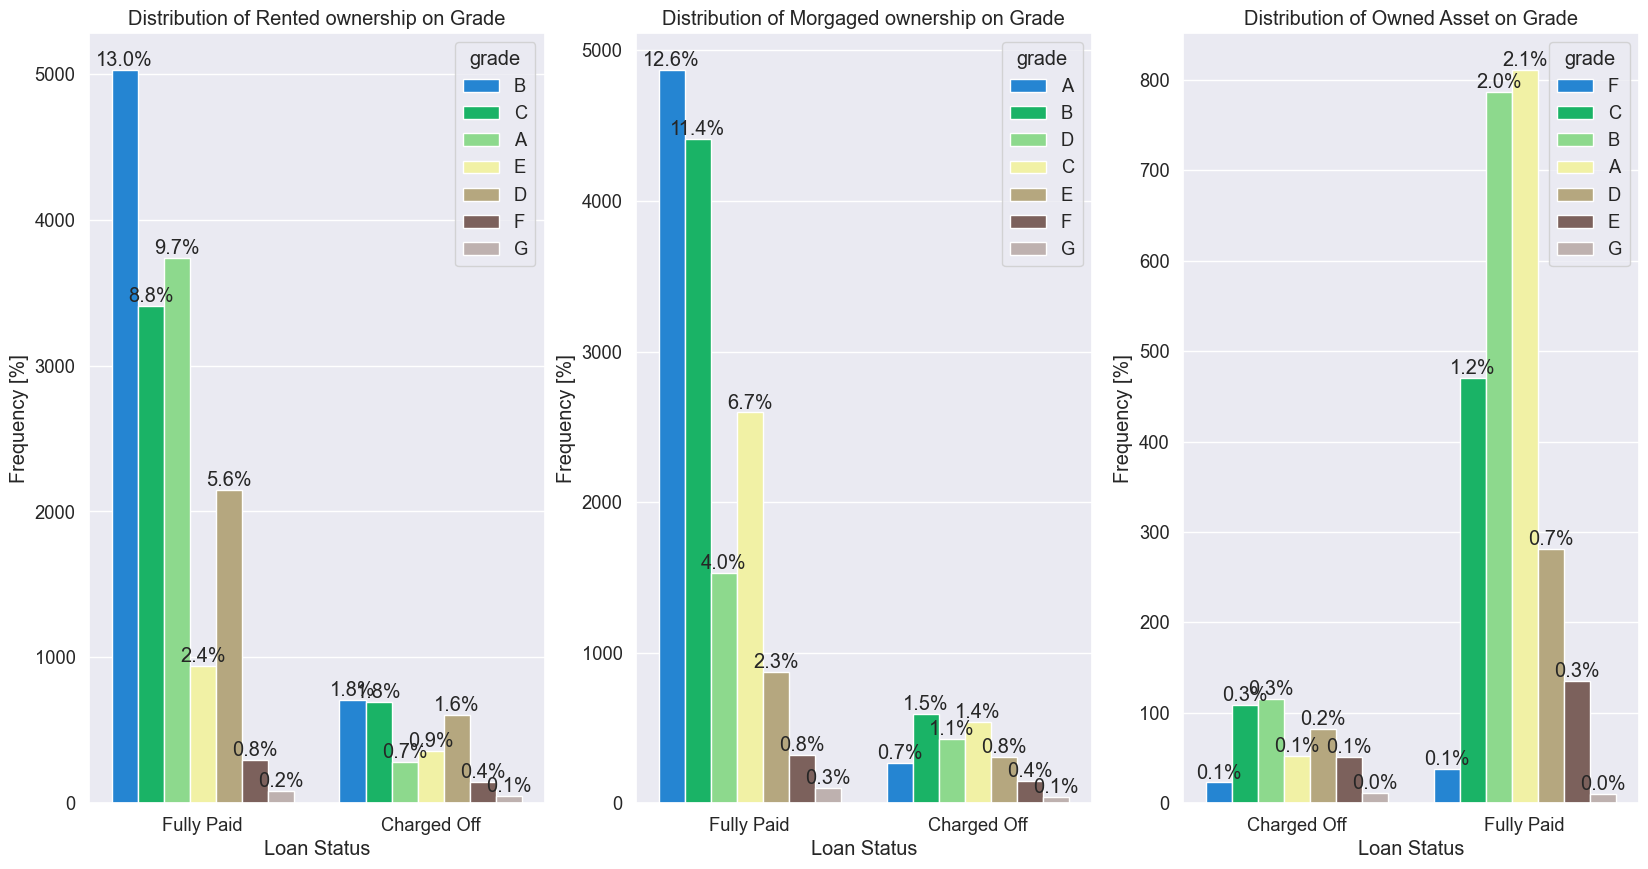

In [114]:
fig, axs = plt.subplots(ncols=3,figsize=(20,10))
create_subplot('loan_status',df[df['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Grade','grade','terrain',0, axs[0])
create_subplot('loan_status',df[df['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Grade','grade','terrain',0, axs[1])   
create_subplot('loan_status',df[df['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Grade','grade','terrain',0, axs[2])   


## Correlations:

In [97]:
numerical_df = df.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate','installment','emp_length','annual_inc','dti']) 
cor = numerical_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti
loan_amnt,1.000,0.982,0.938,0.301,0.932,0.129,0.269,0.062
funded_amnt,0.982,1.000,0.956,0.305,0.958,0.128,0.265,0.062
funded_amnt_inv,0.938,0.956,1.000,0.297,0.905,0.141,0.252,0.071
int_rate,0.301,0.305,0.297,1.000,0.277,-0.012,0.049,0.111
installment,0.932,0.958,0.905,0.277,1.000,0.102,0.268,0.052
emp_length,0.129,0.128,0.141,-0.012,0.102,1.000,0.094,0.044
annual_inc,0.269,0.265,0.252,0.049,0.268,0.094,1.000,-0.122
dti,0.062,0.062,0.071,0.111,0.052,0.044,-0.122,1.000


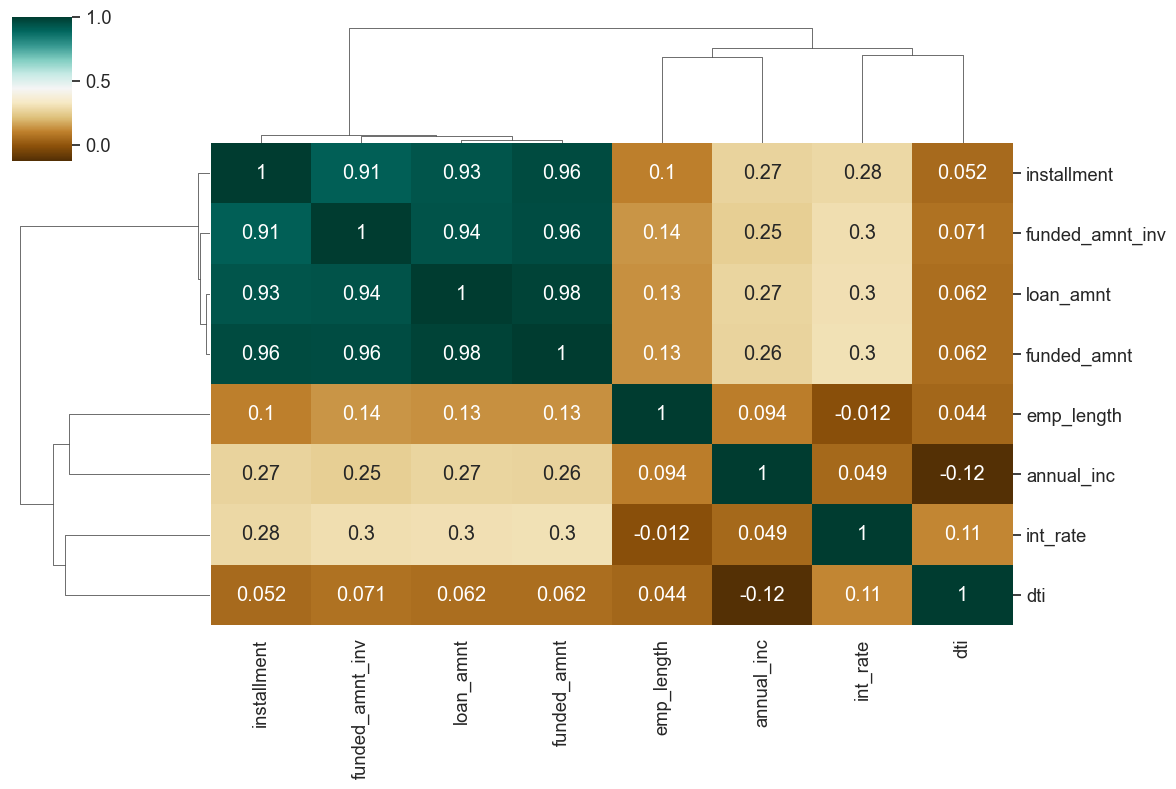

In [100]:
sns.set(font_scale = 1.2)
sns.clustermap(cor, annot=True, figsize = (12,8), cmap='BrBG')
plt.show()

#### 1. Installments, funded amounts, loan amounts are highly correlated


# Insights:

1. People with Medium DTI Ratio should be monitored
2. People who avail a loan in categories B and C should be monitored
3. People who have an experience of more than 7 years should be monitored
4. Most of the loans are taken for debt consolidations
5. Most of people who take loans for small businesses are likely to default on the loan
6. People who avail the loans with a substantially high interest rate are likely to default 
7. Loans taken with a term of 60 months should be monitored as the highest defaults are seen in this range